# **CVI - 2022**

The code is open source so it can be used as an starting point for your personal projects (Ref-ISBN: 9781098102333)

##### **Dataset**
The dataset can be found and freely downloaded from the below bucket:

* gs://cloud-ml-data/img/flower_photos/train_set.csv
* gs://cloud-ml-data/img/flower_photos/eval_set.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd


/content


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/AABC')


/content/drive/My Drive/Practical ML Book


In [ ]:
!pwd

/content/drive/My Drive/Practical ML Book


In [ ]:
!ls

eval_set.csv  flower_photos  mine.ipynb  train_set.csv


In [ ]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten
print(tf.version.VERSION)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

2.8.2
Found GPU at: /device:GPU:0


# Some EDA 

In [ ]:
def read_and_decode(filename, reshape_dims):
  # Read the file
  img = tf.io.read_file(filename)
  # Convert the compressed string to a 3D uint8 tensor.
  img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # Resize the image to the desired size.
  return tf.image.resize(img, reshape_dims)

In [ ]:
CLASS_NAMES = [item.numpy().decode("utf-8") for item in 
               tf.strings.regex_replace(
                 tf.io.gfile.glob("flower_photos/*"),
                 "flower_photos/", "")]
CLASS_NAMES = [item for item in CLASS_NAMES if item.find(".") == -1]

In [ ]:
CLASS_NAMES

['sunflowers', 'tulips', 'roses', 'daisy', 'dandelion']

In [ ]:
CLASS_NAMES[0]

'daisy'

In [ ]:
all_flowers = tf.io.gfile.glob("flower_photos/*/*")

In [ ]:
all_flowers[:5]

['flower_photos/sunflowers/3749091071_c146b33c74_n.jpg',
 'flower_photos/sunflowers/16616096711_12375a0260_n.jpg',
 'flower_photos/sunflowers/7820305664_82148f3bfb_n.jpg',
 'flower_photos/sunflowers/20406385204_469f6749e2_n.jpg',
 'flower_photos/sunflowers/20407896403_a50fef58ac_n.jpg']

In [ ]:
len(all_flowers)

3670

Shape: (224, 224, 3)


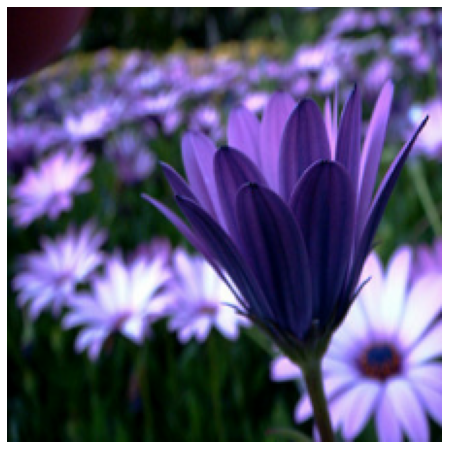

In [ ]:
# Try reading and displaying one of the files
import random
def show_image(filename):
    img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
    print("Shape:", img.shape)
    plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imshow((img.numpy()));
show_image(all_flowers[random.randint(1,len(all_flowers))])

In [ ]:
all_flowers[0]

'flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

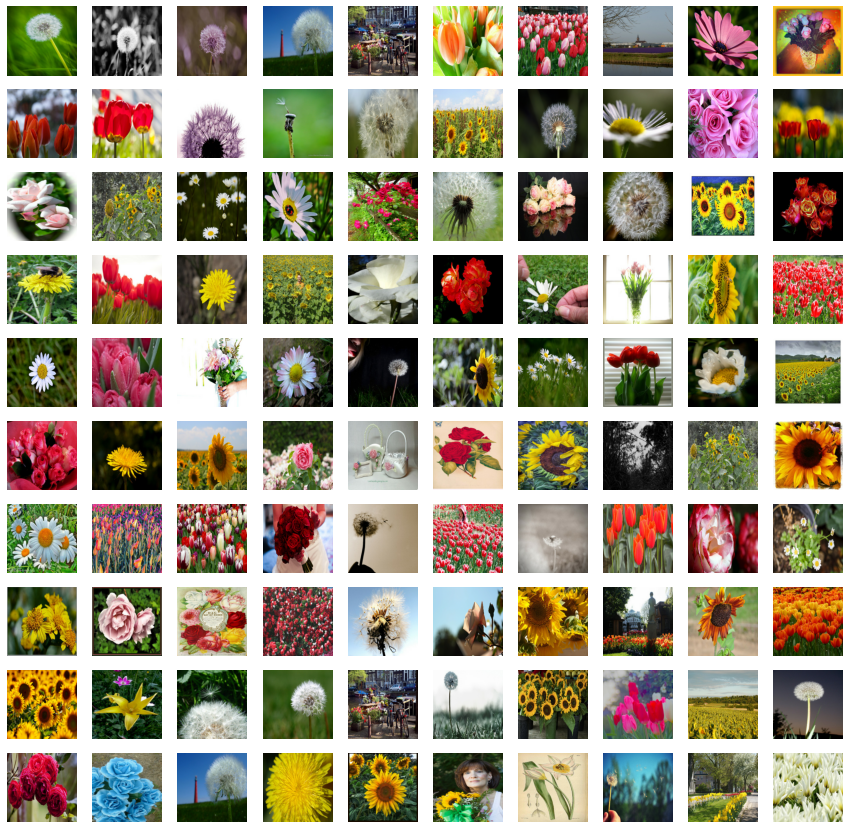

In [ ]:
import random
import matplotlib
fig, axes = plt.subplots(10,10,figsize=(15,15))
for i in range(10):
    for j in range(10):
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
        axes[i,j].spines['top'].set_visible(False)
        axes[i,j].spines['right'].set_visible(False)
        axes[i,j].spines['bottom'].set_visible(False)
        axes[i,j].spines['left'].set_visible(False)
        axes[i,j].imshow(read_and_decode(all_flowers[random.randint(1, len(all_flowers))], [IMG_HEIGHT, IMG_WIDTH]))
# remove the x and y ticks


In [ ]:
# get labels
flowers_df = pd.DataFrame(all_flowers, columns=['Path'])
flowers_df.head(10)

,Path
0,flower_photos\roses\10090824183_d02c613f10_m.jpg
1,flower_photos\roses\102501987_3cdb8e5394_n.jpg
2,flower_photos\roses\10503217854_e66a804309.jpg
3,flower_photos\roses\10894627425_ec76bbc757_n.jpg
4,flower_photos\roses\110472418_87b6a3aa98_m.jpg
5,flower_photos\roses\11102341464_508d558dfc_n.jpg
6,flower_photos\roses\11233672494_d8bf0a3dbf_n.jpg
7,flower_photos\roses\11694025703_9a906fedc1_n.jpg
8,flower_photos\roses\118974357_0faa23cce9_n.jpg
9,flower_photos\roses\11944957684_2cc806276e.jpg


In [ ]:
labels = [x.split("\\x")[0].split('\\')[1] for x in flowers_df.Path]

In [ ]:
filenames = [x.split("\\x")[0].split('\\')[2] for x in flowers_df.Path]

In [ ]:
flowers_df['Labels'] = labels
flowers_df['FileNames'] = filenames

In [ ]:
flowers_df.sample(10)

,Path,Labels,FileNames
3640,flower_photos\dandelion\8981828144_4b66b4edb6_...,dandelion,8981828144_4b66b4edb6_n.jpg
1947,flower_photos\daisy\5973488341_50bdf6cee3_n.jpg,daisy,5973488341_50bdf6cee3_n.jpg
801,flower_photos\tulips\14074147406_7ab87aec79_n.jpg,tulips,14074147406_7ab87aec79_n.jpg
1167,flower_photos\tulips\471298577_cc7558bcf1.jpg,tulips,471298577_cc7558bcf1.jpg
3564,flower_photos\dandelion\8270191872_61e47ae3b8_...,dandelion,8270191872_61e47ae3b8_m.jpg
2510,flower_photos\sunflowers\4933229889_c5d9e36392...,sunflowers,4933229889_c5d9e36392.jpg
1138,flower_photos\tulips\4571993204_5b3efe0e78.jpg,tulips,4571993204_5b3efe0e78.jpg
897,flower_photos\tulips\16138212287_643bf336e1_m.jpg,tulips,16138212287_643bf336e1_m.jpg
259,flower_photos\roses\2609353769_dc3654f12f.jpg,roses,2609353769_dc3654f12f.jpg
2740,flower_photos\sunflowers\9482209981_bf7bf6022b...,sunflowers,9482209981_bf7bf6022b_m.jpg


In [ ]:
flowers_df = flowers_df.drop(columns=["Path"], axis=1)

In [ ]:
flowers_df.sample(10)

,Labels,FileNames
1671,daisy,2539552964_921cf645ba_n.jpg
3666,dandelion,9853885425_4a82356f1d_m.jpg
1674,daisy,2561352120_7961d8263f.jpg
460,roses,5292988046_a10f4b0365_n.jpg
1741,daisy,3491933306_43cfe2cfbe.jpg
489,roses,5799616059_0ffda02e54.jpg
3272,dandelion,4278757393_bca8415ed4_n.jpg
640,roses,8692040971_826614516f_n.jpg
632,roses,8667101118_87ea757b15.jpg
2982,dandelion,17244252705_328e0bcda6.jpg


In [ ]:
def parscsvline(row):
    cols = ["path", "flower"]
    filename, label = tf.io.decode_csv(row, record_defaults=cols)
    img = read_and_decode (filename, [IMG_HEIGHT, IMG_WIDTH])
    return img, label

In [ ]:
dataset = tf.data.TextLineDataset("train_set.csv")

In [ ]:
type(dataset)

tensorflow.python.data.ops.readers.TextLineDatasetV2

In [ ]:
dataset = dataset.map(parscsvline)

In [ ]:
for img, label in dataset.take(3):
    print(img.shape)
    print(label)
    ave = tf.math.reduce_mean(img, axis=[0,1])
    print("-----")

(224, 224, 3)
tf.Tensor(b'daisy', shape=(), dtype=string)
-----
(224, 224, 3)
tf.Tensor(b'dandelion', shape=(), dtype=string)
-----
(224, 224, 3)
tf.Tensor(b'dandelion', shape=(), dtype=string)
-----


In [ ]:
CLASS_NAMES

['sunflowers', 'tulips', 'roses', 'daisy', 'dandelion']

In [ ]:
model = keras.Sequential([
    Flatten(input_shape= (IMG_HEIGHT, IMG_WIDTH, 3)),
    Dense(units=len(CLASS_NAMES), activation='softmax')
                         ])

In [ ]:
model.compile(
    optimizer="adam", 
    loss=keras.losses.CategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 5)                 752645    
                                                                 
Total params: 752,645
Trainable params: 752,645
Non-trainable params: 0
_________________________________________________________________


# **Linear Classification Model**

In [ ]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten
import matplotlib
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Practical ML Book')

IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

CLASS_NAMES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

def read_reshape_img(filename, reshape_dims):
    img = tf.io.read_file(filename)
    # Convert the compressed string to a 3D uint8 tensor.
    img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)
    # Use `convert_image_dtype` to convert to floats in the [0,1] range.
    img = tf.image.convert_image_dtype(img, tf.float32)
    # Resize the image to the desired size.
    return tf.image.resize(img, reshape_dims)

def decode_csv(row):
    cols = ["path", "flower"]
    filename, label = tf.io.decode_csv(records=row, record_defaults=cols)
    img = read_reshape_img(filename, [IMG_HEIGHT, IMG_WIDTH])
    # numerizing the label (not one-hot encode)
    # So the label is sparse
    label = tf.argmax(tf.math.equal(CLASS_NAMES, label))
    return img, label

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dataset = tf.data.TextLineDataset('train_set.csv')
# label is sparse 0 to 4
for line in train_dataset.take(10):
    img, label = decode_csv(line)
    print(label)

tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)


In [ ]:
train_dataset = tf.data.TextLineDataset('train_set.csv').map(decode_csv).batch(10)
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
eval_dataset = tf.data.TextLineDataset('eval_set.csv').map(decode_csv).batch(10)
eval_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
model =keras.Sequential(layers=[
    Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Dense(units=len(CLASS_NAMES), activation='softmax')
])
model.compile(optimizer='adam', 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 5)                 752645    
                                                                 
Total params: 752,645
Trainable params: 752,645
Non-trainable params: 0
_________________________________________________________________


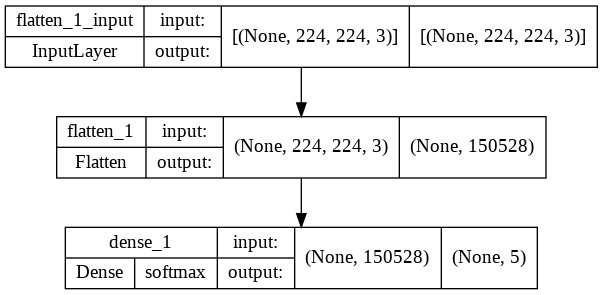

In [ ]:
import pydotplus
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [ ]:
history = model.fit(train_dataset, validation_data=eval_dataset, epochs=10)

Epoch 1/10
330/330 [==============================] - 735s 2s/step - loss: 16.7190 - accuracy: 0.3421 - val_loss: 20.2664 - val_accuracy: 0.3514
Epoch 2/10
330/330 [==============================] - 496s 2s/step - loss: 13.9303 - accuracy: 0.4152 - val_loss: 24.2151 - val_accuracy: 0.3378
Epoch 3/10
330/330 [==============================] - 409s 1s/step - loss: 12.9544 - accuracy: 0.4442 - val_loss: 24.9489 - val_accuracy: 0.3541
Epoch 4/10
330/330 [==============================] - 330s 1000ms/step - loss: 14.6144 - accuracy: 0.4645 - val_loss: 19.4181 - val_accuracy: 0.4243
Epoch 5/10
330/330 [==============================] - 343s 1s/step - loss: 13.8787 - accuracy: 0.4882 - val_loss: 21.6845 - val_accuracy: 0.4081
Epoch 6/10
330/330 [==============================] - 333s 1s/step - loss: 14.1187 - accuracy: 0.5173 - val_loss: 26.3390 - val_accuracy: 0.4351
Epoch 7/10
330/330 [==============================] - 368s 1s/step - loss: 12.5167 - accuracy: 0.5548 - val_loss: 27.4460 - va

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(15,5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric])
        ax[idx].set_xlabel("Epochs")
        # ax[idx].set_ylabel(metric, fontweight='bold', fontsize=20)
        ax[idx].plot(history.history['val_' + metric], ls='dashed');
        ax[idx].legend([metric, 'val_' + metric], fontsize=20)

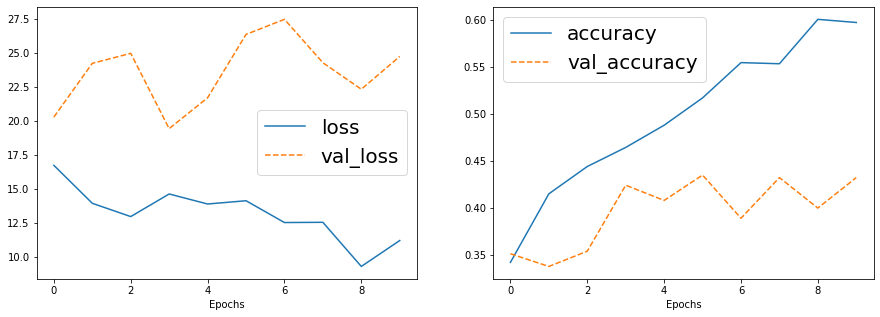

In [ ]:
training_plot(['loss', 'accuracy'], history)
###### Choppy loss graph ----> we should improve batch size and optimizer settings
###### model is overfitting ---> Might need regularization

In [ ]:
# Call model.predict() on a few images in the evaluation dataset
def plot_predictions(filename):
  matplotlib.rcParams.update({'font.size': 14})
  f, ax = plt.subplots(3, 5, figsize=(25,15))
  dataset = (tf.data.TextLineDataset(filename).
      map(decode_csv))
  for idx, (img, label) in enumerate(dataset.take(15)):
    ax[idx//5, idx%5].imshow((img.numpy()));
    batch_image = tf.reshape(img, [1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])
    batch_pred = model.predict(batch_image)
    pred = batch_pred[0]
    label = CLASS_NAMES[label.numpy()]
    pred_label_index = tf.math.argmax(pred).numpy()
    pred_label = CLASS_NAMES[pred_label_index]
    prob = pred[pred_label_index]
    ax[idx//5, idx%5].set_title('{} -> {} ({:.2f})'.format(label, pred_label, prob))
    ax[idx//5, idx%5].axis('off')

plot_predictions("gs://cloud-ml-data/img/flower_photos/train_set.csv")

Output hidden; open in https://colab.research.google.com to view.

# **Regression Model**

In [ ]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten
import matplotlib
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Practical ML Book')

IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

CLASS_NAMES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

def read_reshape_img(filename, reshape_dims):
    img = tf.io.read_file(filename)
    # Convert the compressed string to a 3D uint8 tensor.
    img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS)
    # Use `convert_image_dtype` to convert to floats in the [0,1] range.
    img = tf.image.convert_image_dtype(img, tf.float32)
    # Resize the image to the desired size.
    return tf.image.resize(img, reshape_dims)

def decode_csv(row):
    cols = ["path", "flower"]
    filename, label = tf.io.decode_csv(records=row, record_defaults=cols)
    img = read_reshape_img(filename, [IMG_HEIGHT, IMG_WIDTH])
    # numerizing the label (not one-hot encode)
    # So the label is sparse
    label = tf.argmax(tf.math.equal(CLASS_NAMES, label))
    return img, label

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dataset = tf.data.TextLineDataset('train_set.csv').map(decode_csv).batch(10)
eval_dataset = tf.data.TextLineDataset('eval_set.csv').map(decode_csv).batch(10)

model =keras.Sequential(layers=[
    Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Dense(units=1, activation= None)
])
model.compile(optimizer='adam', 
              loss=keras.losses.MeanSquaredError(), 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 150529    
                                                                 
Total params: 150,529
Trainable params: 150,529
Non-trainable params: 0
_________________________________________________________________


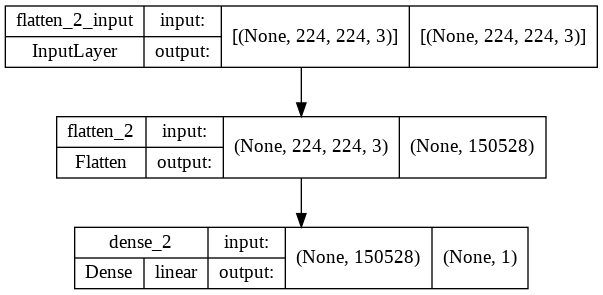

In [ ]:
import pydotplus
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

# Notice
Copyright 2020 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.